In [11]:
import numpy as np
import pandas as pd
from dirty_cat import SimilarityEncoder
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [2]:
PATH = '../data/groups_topics.csv'
df = pd.read_csv(PATH)

In [5]:
df['topic_key'].value_counts()

socialnetwork                  1848
professional-networking        1582
social                         1447
newtech                        1239
spirituality                    916
                               ... 
heath-wellness                    1
midnight-movies                   1
language-teachers                 1
asl-sign-languages                1
african-american-literature       1
Name: topic_key, Length: 961, dtype: int64

In [21]:
sorted_values = df['topic_key'].sort_values().unique()

In [22]:
sorted_values.shape

(961,)

In [23]:
similarity_encoder = SimilarityEncoder(similarity='ngram')
transformed_values = similarity_encoder.fit_transform(
    sorted_values.reshape(-1, 1))

In [24]:
transformed_values[1,5]==transformed_values[5,1]

True

### Dimension scaling

In [25]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed', n_init=10, random_state=42)
two_dim_data = mds.fit_transform(
    1 - transformed_values)  # transformed values lie
# in the 0-1 range, so 1-transformed_value yields a positive dissimilarity matrix
print(two_dim_data.shape)
print(sorted_values.shape)

(961, 2)
(961,)


In [36]:
two_dim_data

array([[ 0.34747955, -0.69356827],
       [-0.2557165 ,  0.6590947 ],
       [ 0.63872885,  0.3656153 ],
       ...,
       [-0.02454603,  0.41460862],
       [-0.00226787, -0.47095668],
       [ 0.56939327, -0.46995551]])

### KNN 

In [41]:
n_points = 8
np.random.seed(42)
from sklearn.neighbors import NearestNeighbors

random_points = np.random.choice(len(similarity_encoder.categories_[0]),
                                 n_points, replace=False)
nn = NearestNeighbors(n_neighbors=2).fit(transformed_values)
_, indices_ = nn.kneighbors(transformed_values[random_points])
indices = np.unique(indices_.squeeze())

In [42]:
indices

array([189, 215, 277, 344, 351, 381, 465, 583, 639, 664, 666, 736, 777,
       778, 913, 921], dtype=int64)

### Plot

Text(0.5, 1.0, 'multi-dimensional-scaling representation using a 3gram similarity matrix')

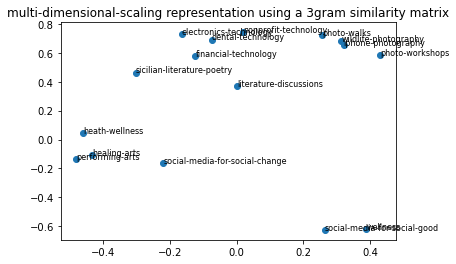

In [43]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.scatter(x=two_dim_data[indices, 0], y=two_dim_data[indices, 1])
# adding the legend
for x in indices:
    ax.text(x=two_dim_data[x, 0], y=two_dim_data[x, 1], s=sorted_values[x],
            fontsize=8)
ax.set_title(
    'multi-dimensional-scaling representation using a 3gram similarity matrix')

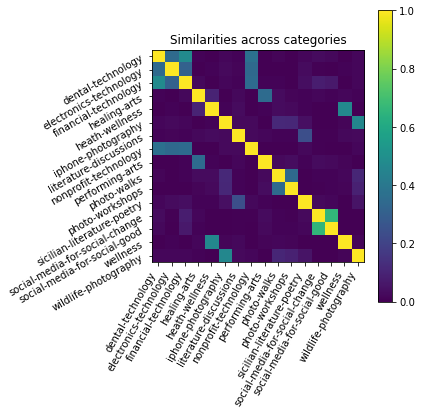

In [31]:
f2, ax2 = plt.subplots(figsize=(6, 6))
cax2 = ax2.matshow(transformed_values[indices, :][:, indices])
ax2.set_yticks(np.arange(len(indices)))
ax2.set_xticks(np.arange(len(indices)))
ax2.set_yticklabels(sorted_values[indices], rotation='30')
ax2.set_xticklabels(sorted_values[indices], rotation='60', ha='right')
ax2.xaxis.tick_bottom()
ax2.set_title('Similarities across categories')
f2.colorbar(cax2)
f2.tight_layout()